# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages, which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission if necessary. 

> **Note**: Once you have completed all of the code implementations, you need to finalize your work by exporting the iPython Notebook as an HTML document. Before exporting the notebook to html, all of the code cells need to have been run so that reviewers can see the final implementation and output. You can then export the notebook by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission. 

In addition to implementing code, there is a writeup to complete. The writeup should be completed in a separate file, which can be either a markdown file or a pdf document. There is a [write up template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) that can be used to guide the writing process. Completing the code template and writeup template will cover all of the [rubric points](https://review.udacity.com/#!/rubrics/481/view) for this project.

The [rubric](https://review.udacity.com/#!/rubrics/481/view) contains "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. The stand out suggestions are optional. If you decide to pursue the "stand out suggestions", you can include the code in this Ipython notebook and also discuss the results in the writeup file.


>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

TODO: 
    Change the current implementation to do gray scale images and see how it performs. This will require some modification to the 
    parameters :
        - X_train_feature, 
        - Each Convolutional Layer 
        - Each Fully Connected layer 
        - The training and evaluation loops 

---
## Step 0: Load The Data

In [1]:
!pwd

/home/workspace/CarND-Traffic-Sign-Classifier-Project


In [2]:
# Perform all the imports 
import pickle
import pandas as pd
import numpy as np
import random
%matplotlib inline
import csv
import random as rd 
import cv2 
import glob 
import matplotlib.pyplot as plt
from matplotlib.pyplot import imsave

In [3]:
# TODO: Fill this in based on where you saved the training and testing data

training_file = '/home/workspace/data/train.p'
validation_file= '/home/workspace/data/valid.p'
testing_file = '/home/workspace/data/test.p'

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(validation_file, mode='rb') as f:
    valid = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_valid, y_valid = valid['features'], valid['labels']
X_test, y_test = test['features'], test['labels']

In [4]:
# Visualise the size of the training, validation and testing splits 
#Image information
print("X_train:", X_train.shape)
print("X_valid: ", X_valid.shape)
print("X_test: ", X_test.shape)


#Classes information 
print("\nY_train: ", y_train.shape)
print("Y_valid: ", y_valid.shape)
print("Y_test: ", y_test.shape)

X_train: (34799, 32, 32, 3)
X_valid:  (4410, 32, 32, 3)
X_test:  (12630, 32, 32, 3)

Y_train:  (34799,)
Y_valid:  (4410,)
Y_test:  (12630,)


---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 1D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below. Use python, numpy and/or pandas methods to calculate the data summary rather than hard coding the results. For example, the [pandas shape method](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.shape.html) might be useful for calculating some of the summary results. 

In [5]:
image_shape = X_train.shape[1:len(X_train.shape)]
print(image_shape)
print(type(y_train[2]))

(32, 32, 3)
<class 'numpy.uint8'>


### Provide a Basic Summary of the Data Set Using Python, Numpy and/or Pandas

In [6]:
### Replace each question mark with the appropriate value. 
### Use python, pandas or numpy methods rather than hard coding the results

# TODO: Number of training examples
n_train = X_train.shape[0]

# TODO: Number of validation examples
n_validation = X_valid.shape[0]

# TODO: Number of testing examples.
n_test = X_test.shape[0]

# TODO: What's the shape of an traffic sign image?
image_shape = X_train.shape[1:len(X_train.shape)]

# TODO: How many unique classes/labels there are in the dataset.
n_classes = max(y_train)+1
n_class_range = min(y_train), max(y_train)

print("Number of training examples =", n_train)
print("Number of testing examples =", n_test)
print("Number of validation examples = ", n_validation)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)
print("Classes range from: ", n_class_range) 

Number of training examples = 34799
Number of testing examples = 12630
Number of validation examples =  4410
Image data shape = (32, 32, 3)
Number of classes = 43
Classes range from:  (0, 42)


### Include an exploratory visualization of the dataset

Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc. 

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections. It can be interesting to look at the distribution of classes in the training, validation and test set. Is the distribution the same? Are there more examples of some classes than others?

Text(0.5,1,'Sample Image Visualization class num: 5')

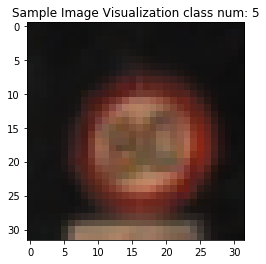

In [7]:
idx = random.randint(0, len(X_train))
image = X_train[idx]

# Visualise the figure
plt.figure(1)
plt.imshow(image)
plt.title("Sample Image Visualization class num: " + str(y_train[idx]))

Random integer:  33
Image Class:  32
Image Description:  End of all speed and passing limits


Text(0.5,1,'End of all speed and passing limits')

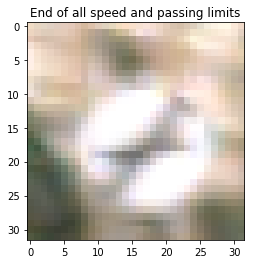

In [8]:
randomInt = rd.randint(min(y_train), max(y_train)-1)
print("Random integer: ", randomInt)

# Define path to file 
PATH_2_SIGNAMES = '/home/workspace/CarND-Traffic-Sign-Classifier-Project/signnames.csv'

#Define empty dictionary and empty lists
sign_dict = {}
sign_class_number = [] 
sign_class_descriptions =[] 

with open(PATH_2_SIGNAMES, 'r') as f: 
    reader = csv.reader(f)
    for read in reader:
        sign_class_number.append(read[0])   # Class numbers list
        sign_class_descriptions.append(read[1]) # Class descriptions list 
        sign_dict.update({read[0] : read[1]}) # Class Dictionary with both numbers and descriptions

        
# Print of some information to make sure indexing is correct
# Compare this with the .csv file
print("Image Class: " , sign_class_number[randomInt])
print("Image Description: ", sign_class_descriptions[randomInt])
plt.figure(2)
plt.imshow(X_train[randomInt])
plt.title(sign_class_descriptions[randomInt])

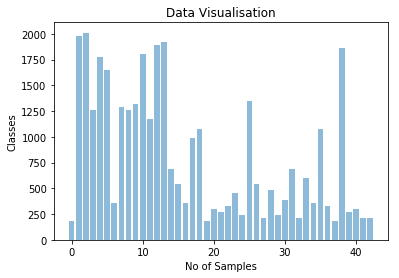

In [9]:
# Data visualisation 

#uni,index,count=np.unique(y_train,return_index=true,return_count=true)
class_arr= []
samples_arr=[]

for class_n in range(n_classes):
    class_id = np.where(y_train == class_n)
    n_samples = len(class_id[0])
    class_arr.append(class_n)
    samples_arr.append(n_samples)
    
#plt.hist(y_train,bins=43)
plt.bar( class_arr, samples_arr,align='center', alpha=0.5)
plt.ylabel('Classes')
plt.xlabel('No of Samples')
plt.title('Data Visualisation')
plt.show()
plt.savefig("Data Visualisation")

----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play! 

With the LeNet-5 solution from the lecture, you should expect a validation set accuracy of about 0.89. To meet specifications, the validation set accuracy will need to be at least 0.93. It is possible to get an even higher accuracy, but 0.93 is the minimum for a successful project submission. 

There are various aspects to consider when thinking about this problem:

- Neural network architecture (is the network over or underfitting?)
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

### Pre-process the Data Set (normalization, grayscale, etc.)

Minimally, the image data should be normalized so that the data has mean zero and equal variance. For image data, `(pixel - 128)/ 128` is a quick way to approximately normalize the data and can be used in this project. 

Other pre-processing steps are optional. You can try different techniques to see if it improves performance. 

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project.

In [10]:
len(X_train)

34799

Random integer:  1
Sample Image idx:  12097
Sample Image Class:  9
Description:  No passing


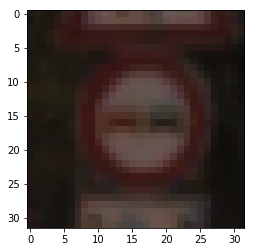

In [11]:
# Take a random sample, gray scale and normalise it 
randomInt = rd.randint(min(y_train), max(y_train)-1)
print("Random integer: ", randomInt)


sample_image_index = rd.randint(0, len(X_train)) 
sample_image = X_train[sample_image_index]
sample_image_class = y_train[sample_image_index]
sample_image_class_descrip = sign_class_descriptions[sample_image_class+1]

print("Sample Image idx: ", sample_image_index)
print("Sample Image Class: ", sample_image_class)
print("Description: ", sample_image_class_descrip)
plt.figure()
plt.imshow(sample_image)

# Normalise the image 
sample_img_normalized = sample_image/255.0

# Gray scale the image
gray_image = cv2.cvtColor(sample_image, cv2.COLOR_BGR2GRAY)

plt.figure(1)
plt.imshow(sample_image)

In [12]:
def reshape_images(imgs): 
    
    def gray(src): 
        if src.dtype == np.uint8: 
            src = np.array(src/255.0, dtype = np.float32) 
        dst= cv2.cvtColor(src, cv2.COLOR_BGR2GRAY) 
        return dst.reshape(32, 32, 1)
    
    normalized = [gray(img) for img in imgs] 
    return np.array(normalized) 

# Define the new gray scale and normalized feature sets 

# Training sets 
X_train_feature = reshape_images(X_train)
X_train.shape
print(X_train_feature.shape)

# Validation sets 
X_valid_feature = reshape_images(X_valid)
print(X_valid_feature.shape)

# Testing set 
X_test_feature = reshape_images(X_test)
print(X_test_feature.shape)

(34799, 32, 32, 1)
(4410, 32, 32, 1)
(12630, 32, 32, 1)


In [13]:
# Shuffle the data around 
from sklearn.utils import shuffle
X_train, y_train = shuffle(X_train, y_train)

## Model Architecture

In [14]:
# Import the libraries 
import tensorflow as tf
from tensorflow.contrib.layers import flatten 

# Define some of the hyper parameters for the LeNet CNN 
EPOCHS = 75 # number of times the data will train
BATCH_SIZE = 250 # the number of training images to run through the network at once   


In [15]:
def LeNet(x):    
    # Arguments used for tf.truncated_normal, randomly defines variables for the weights and biases for each layer
    mu = 0
    sigma = 0.1
    # Layer 1: Convolutional. Input = 32x32x3. Output = 28x28x6.
    conv1_W= tf.Variable(tf.truncated_normal(shape=(5,5,3,6), mean=mu, stddev=sigma))
    conv1_b= tf.Variable(tf.zeros(6))
    conv1= tf.nn.conv2d(x,conv1_W,strides=[1,1,1,1],padding='VALID',use_cudnn_on_gpu=True) + conv1_b
    # Activation.
    conv1= tf.nn.relu(conv1)
    # Layer 2: Convolutional. Input = 28x28x6. Output = 14x14x10.
    conv2_W= tf.Variable(tf.truncated_normal(shape=(5,5,6,10), mean=mu, stddev=sigma))
    conv2_b= tf.Variable(tf.zeros(10))
    conv2= tf.nn.conv2d(conv1,conv2_W,strides=[1,2,2,1],padding='VALID',use_cudnn_on_gpu=True) + conv2_b
    # Activation.
    conv2= tf.nn.relu(conv2)
    # Layer 3: Convolutional. Input = 14x14x10. Output = 8x8x16.
    conv3_W= tf.Variable(tf.truncated_normal(shape=(5,5,10,16),mean=mu,stddev=sigma))
    conv3_b=tf.Variable(tf.zeros(16))
    conv3= tf.nn.conv2d(conv2,conv3_W,strides=[1,1,1,1],padding='VALID',use_cudnn_on_gpu=True) + conv3_b
    # Activation.
    conv3= tf.nn.relu(conv3)
    # Pooling. Input = 8x8x16. Output = 4x4x16.
    conv3= tf.nn.max_pool(conv3,ksize=[1,2,2,1],strides=[1,2,2,1],padding='VALID')
    # Flatten. Input = 4x4x16. Output = 256.
    f= flatten(conv3)
    # Layer 4: Fully Connected. Input = 256. Output = 120.
    fc1_W= tf.Variable(tf.truncated_normal(shape=(int(np.shape(f)[1]),120),mean=mu,stddev=sigma))
    fc1_b= tf.Variable(tf.zeros(shape=120))
    fc1= tf.matmul(f,fc1_W) + fc1_b
    # Activation.
    fc1= tf.nn.relu(fc1)   
    # Introduce Dropout after first fully connected layer
    fc1 = tf.nn.dropout(fc1, keep_prob)
    # Layer 5: Fully Connected. Input = 120. Output = 100.
    fc2_W= tf.Variable(tf.truncated_normal(shape=(120,100),mean=mu,stddev=sigma))
    fc2_b= tf.Variable(tf.zeros(100))
    fc2= tf.matmul(fc1,fc2_W) + fc2_b   
    # Activation.
    fc2= tf.nn.relu(fc2)  
    # Layer 6: Fully Connected. Input = 100. Output = 84.
    fc3_W= tf.Variable(tf.truncated_normal(shape=(100,84),mean=mu,stddev=sigma))
    fc3_b= tf.Variable(tf.zeros(84))
    fc3= tf.matmul(fc2,fc3_W) + fc3_b  
    # Activation.
    fc3= tf.nn.relu(fc3)  
    # Layer 7: Fully Connected. Input = 84. Output = 43.
    fc4_W= tf.Variable(tf.truncated_normal(shape=(84,43),mean=mu,stddev=sigma))
    fc4_b= tf.Variable(tf.zeros(43))
    fc4= tf.matmul(fc3,fc4_W) + fc4_b 
    logits=fc4      
    return logits

### Features and Labels 

In [16]:
x = tf.placeholder(tf.float32, (None, 32, 32, 3))
y = tf.placeholder(tf.int32, (None))
one_hot_y = tf.one_hot(y, 43) # one hot encoding for output labels
keep_prob = tf.placeholder(tf.float32) # defining the dropout probability after fully connected layer in the architecture

In [17]:
print(n_classes)

43


### Model Evaluation

In [18]:
rate = 0.0009 #learning rate

#defining various operations
logits = LeNet(x) 
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(labels=one_hot_y, logits=logits)
loss_operation = tf.reduce_mean(cross_entropy)
optimizer = tf.train.AdamOptimizer(learning_rate = rate)
training_operation = optimizer.minimize(loss_operation)

In [19]:
correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
saver = tf.train.Saver()

def evaluate(X_data, y_data):
    num_examples = len(X_data)
    total_accuracy = 0
    total_loss=0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        accuracy,loss = sess.run([accuracy_operation,loss_operation],feed_dict={x: batch_x, y: batch_y,keep_prob:1})
        total_accuracy += (accuracy * len(batch_x))
        total_loss+= (loss*len(batch_x)) # getting the total loss to plot a graph later
    return total_accuracy / num_examples, total_loss/num_examples

### Train, Validate and Test the Model

A validation set can be used to assess how well the model is performing. A low accuracy on the training and validation
sets imply underfitting. A high accuracy on the training set but low accuracy on the validation set implies overfitting.

Training...

EPOCH 1 ...
Validation Accuracy = 0.315

EPOCH 2 ...
Validation Accuracy = 0.623

EPOCH 3 ...
Validation Accuracy = 0.765

EPOCH 4 ...
Validation Accuracy = 0.838

EPOCH 5 ...
Validation Accuracy = 0.854

EPOCH 6 ...
Validation Accuracy = 0.883

EPOCH 7 ...
Validation Accuracy = 0.892

EPOCH 8 ...
Validation Accuracy = 0.901

EPOCH 9 ...
Validation Accuracy = 0.906

EPOCH 10 ...
Validation Accuracy = 0.908

EPOCH 11 ...
Validation Accuracy = 0.922

EPOCH 12 ...
Validation Accuracy = 0.921

EPOCH 13 ...
Validation Accuracy = 0.927

EPOCH 14 ...
Validation Accuracy = 0.918

EPOCH 15 ...
Validation Accuracy = 0.937

EPOCH 16 ...
Validation Accuracy = 0.937

EPOCH 17 ...
Validation Accuracy = 0.938

EPOCH 18 ...
Validation Accuracy = 0.939

EPOCH 19 ...
Validation Accuracy = 0.921

EPOCH 20 ...
Validation Accuracy = 0.936

EPOCH 21 ...
Validation Accuracy = 0.941

EPOCH 22 ...
Validation Accuracy = 0.941

EPOCH 23 ...
Validation Accuracy = 0.950

EPOCH 24 ...
Validation Accura

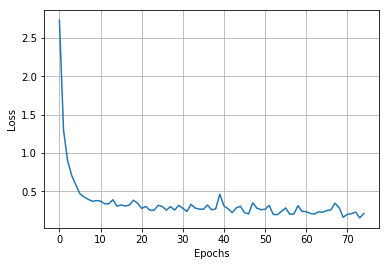

Model saved


In [20]:
# X_train_feature, y_train = shuffle(X_train_feature, y_train)

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    num_examples = len(X_train)
    
    print("Training...")
    print()
    loss_Acc=[]
    for i in range(EPOCHS):
        X_train, y_train = shuffle(X_train, y_train)
        for offset in range(0, num_examples, BATCH_SIZE):
            end = offset + BATCH_SIZE
            batch_x, batch_y = X_train[offset:end], y_train[offset:end]
            sess.run(training_operation, feed_dict={x: batch_x, y: batch_y,keep_prob:0.5})
            
        validation_accuracy,loss_acc = evaluate(X_valid, y_valid)
       
        print("EPOCH {} ...".format(i+1))
        loss_Acc.append(loss_acc)
        print("Validation Accuracy = {:.3f}".format(validation_accuracy))
        print()
    plt.plot(range(0,EPOCHS),loss_Acc)
    plt.ylabel('Loss')
    plt.xlabel('Epochs')
    plt.grid(True)
    plt.show()
    saver.save(sess, './trafficTest')
    print("Model saved")

### Evaluate the Model

In [21]:
X_test_feature.shape, y_test.shape

((12630, 32, 32, 1), (12630,))

In [22]:
with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))
    test_accuracy = evaluate(X_test, y_test)
    print("Test Accuracy = {:.3f}".format(test_accuracy[0]))

INFO:tensorflow:Restoring parameters from ./trafficTest
Test Accuracy = 0.947


In [23]:
### Calculate and report the accuracy on the training and validation set.
### Once a final model architecture is selected, 
### the accuracy on the test set should be calculated and reported as well.
### Feel free to use as many code cells as needed.

---

## Step 3: Test a Model on New Images

To give yourself more insight into how your model is working, download at least five pictures of German traffic signs from the web and use your model to predict the traffic sign type.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

## Load and Output the Images

### Load the images and plot them here.

For this is went to the wikipedia web page and selected 5 images. 
I then downloaded these images onto my local drive. Stored them in a file and then
pushed them to github. I then downloaded them from github onto the jupyter notebook 
and performed my image processing on them aka : resizing and reshapeing

In [24]:
images = [cv2.imread(file) for file in glob.glob('/home/workspace/CarND-Traffic-Sign-Classifier-Project/German_Traffic_Sign_data/Original Dataset/*png')]
print("Number of images loaded from WIKI: ", len(images))

Number of images loaded from WIKI:  6


Perform Image Pre-processing on the images including resizing. No Gray scale was done as this CNN was trained with RGB colors. 

In [25]:
#Resize the images so they are the same size as the other images 
resize = (32, 32)
img0 =  cv2.resize(images[0], resize)
img1 = cv2.resize(images[1], resize)
img2= cv2.resize(images[2], resize) # Image isn't in the class ID's/descriptions
img3= cv2.resize(images[3], resize)
img4 = cv2.resize(images[4], resize)
img5 = cv2.resize(images[5], resize)
# img6 =  cv2.resize(images[6], resize)

print("\nResized Images")
print("Image 0 is size: " , img0.shape)
print("Image 1 is size: ", img1.shape)
print("Image 2 is size: ", img2.shape)
print("Image 3 is size: " , img3.shape)
print("Image 4 is size: " , img4.shape)
print("Image 5 is size: " , img5.shape)
# print("Image 6 is size: " , img6.shape)


img_array = [img0, img1, img2, img3, img4, img5]
img_array = np.array(img_array, dtype = np.uint8)
y_newclasses_descriptions = [sign_class_descriptions[2],
               sign_class_descriptions[28], 
               sign_class_descriptions[13],
              sign_class_descriptions[32],
              sign_class_descriptions[34],
              sign_class_descriptions[15]]
y_new_classes = [1, 27, 12, 31, 33, 14] 
y_new_classes = np.array(y_new_classes, dtype = np.uint8) 


Resized Images
Image 0 is size:  (32, 32, 3)
Image 1 is size:  (32, 32, 3)
Image 2 is size:  (32, 32, 3)
Image 3 is size:  (32, 32, 3)
Image 4 is size:  (32, 32, 3)
Image 5 is size:  (32, 32, 3)


In [34]:
# # Plot all the images before resizing the images 
# count = 1
# testing_images = []
# for i in range(len(img_array)):
#     plt.figure(count)
#     plt.imshow(img_array[i])
#     plt.title(y_newclasses_descriptions[i] + " Image Shape: " + str(img_array[i].shape))
#     count+= 1

Class ID:  14 uint8


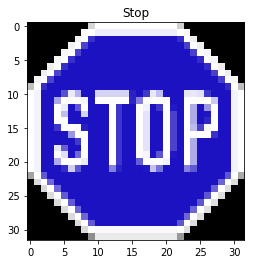

In [35]:
plt.figure()
plt.imshow(img_array[5])
plt.title(y_newclasses_descriptions[5])
print("Class ID: ", y_new_classes[5], img_array[5].dtype)

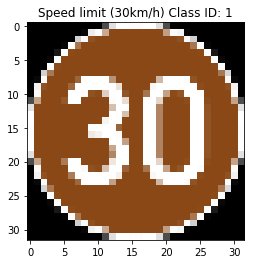

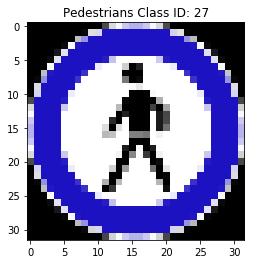

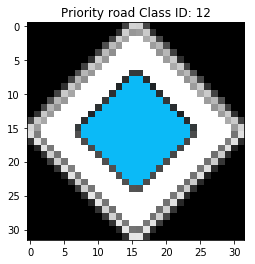

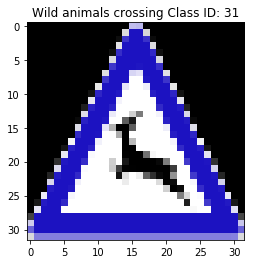

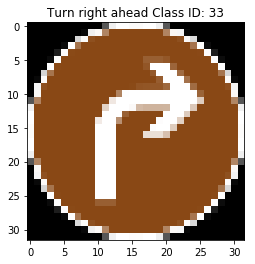

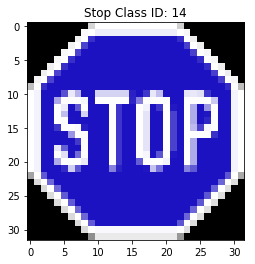

In [36]:
count = 0
testing_images = []
for i in range(len(img_array)):
    image = img_array[i]
    testing_images.append(image)
    plt.figure(count)
    plt.imshow(img_array[count])
    plt.title(y_newclasses_descriptions[count] + str(" Class ID: ") + str(y_new_classes[count]))
    count += 1

In [37]:
# Data comparison before feeding through the CNN
print("\nTraining Image Shape: ", X_train.shape)
print("Testing  Image Shape: ", X_test.shape)
print("Testing2 Image Shape: ", img_array.shape)
print("\nTraining Classes Shape: ", y_train.shape)
print("Testing  Classes Shape: ", y_test.shape)
print("Testing2 Classes Shape: ", y_new_classes.shape)

print("\nTraining Classes Dtype: ", X_train[0].dtype)
print("Testing  Classes Dtype: ", X_test[0].dtype)
print("Testing2 Classes Dtype: ", img_array[0].dtype)
print("\nTraining Classes Dtype: ", y_train.dtype)
print("Testing  Classes Dtype: ", y_test.dtype)
print("Testing2 Classes Dtype: ", y_new_classes.dtype)


Training Image Shape:  (34799, 32, 32, 3)
Testing  Image Shape:  (12630, 32, 32, 3)
Testing2 Image Shape:  (6, 32, 32, 3)

Training Classes Shape:  (34799,)
Testing  Classes Shape:  (12630,)
Testing2 Classes Shape:  (6,)

Training Classes Dtype:  uint8
Testing  Classes Dtype:  uint8
Testing2 Classes Dtype:  uint8

Training Classes Dtype:  uint8
Testing  Classes Dtype:  uint8
Testing2 Classes Dtype:  uint8


### Predict the Sign Type for Each Image

In [30]:
print(y_new_classes)
print(sign_class_number[2])
print(sign_class_descriptions[2])
print(img_array.shape, y_new_classes.shape)
print(img_array.dtype, y_new_classes.dtype)

[ 1 27 12 31 33 14]
1
Speed limit (30km/h)
(6, 32, 32, 3) (6,)
uint8 uint8


### Analyze Performance

In [31]:
### Calculate the accuracy for these 5 new images. 
### For example, if the model predicted 1 out of 5 signs correctly, it's 20% accurate on these new images.
with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))
    test_accuracy = evaluate(img_array, y_new_classes)
    print("Test Accuracy = {:.3f}".format(test_accuracy[0]))

INFO:tensorflow:Restoring parameters from ./trafficTest
Test Accuracy = 0.167


### Output Top 5 Softmax Probabilities For Each Image Found on the Web

For each of the new images, print out the model's softmax probabilities to show the **certainty** of the model's predictions (limit the output to the top 5 probabilities for each image). [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. 

The example below demonstrates how tf.nn.top_k can be used to find the top k predictions for each image.

`tf.nn.top_k` will return the values and indices (class ids) of the top k predictions. So if k=3, for each sign, it'll return the 3 largest probabilities (out of a possible 43) and the correspoding class ids.

Take this numpy array as an example. The values in the array represent predictions. The array contains softmax probabilities for five candidate images with six possible classes. `tf.nn.top_k` is used to choose the three classes with the highest probability:

```
# (5, 6) array
a = np.array([[ 0.24879643,  0.07032244,  0.12641572,  0.34763842,  0.07893497,
         0.12789202],
       [ 0.28086119,  0.27569815,  0.08594638,  0.0178669 ,  0.18063401,
         0.15899337],
       [ 0.26076848,  0.23664738,  0.08020603,  0.07001922,  0.1134371 ,
         0.23892179],
       [ 0.11943333,  0.29198961,  0.02605103,  0.26234032,  0.1351348 ,
         0.16505091],
       [ 0.09561176,  0.34396535,  0.0643941 ,  0.16240774,  0.24206137,
         0.09155967]])
```

Running it through `sess.run(tf.nn.top_k(tf.constant(a), k=3))` produces:

```
TopKV2(values=array([[ 0.34763842,  0.24879643,  0.12789202],
       [ 0.28086119,  0.27569815,  0.18063401],
       [ 0.26076848,  0.23892179,  0.23664738],
       [ 0.29198961,  0.26234032,  0.16505091],
       [ 0.34396535,  0.24206137,  0.16240774]]), indices=array([[3, 0, 5],
       [0, 1, 4],
       [0, 5, 1],
       [1, 3, 5],
       [1, 4, 3]], dtype=int32))
```

Looking just at the first row we get `[ 0.34763842,  0.24879643,  0.12789202]`, you can confirm these are the 3 largest probabilities in `a`. You'll also notice `[3, 0, 5]` are the corresponding indices.

In [32]:
### Print out the top five softmax probabilities for the predictions on the German traffic sign images found on the web. 
### Feel free to use as many code cells as needed.

softmax_logits = tf.nn.softmax(logits)
top_k = tf.nn.top_k(softmax_logits, k=5)

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    saver.restore(sess, tf.train.latest_checkpoint('.'))
    my_softmax_logits = sess.run(softmax_logits, feed_dict={x: testing_images, keep_prob: 1.0})
    my_top_k = sess.run(top_k, feed_dict={x: testing_images, keep_prob: 1.0})
    print(my_softmax_logits)
    print(my_top_k)

INFO:tensorflow:Restoring parameters from ./trafficTest
[[  1.33401330e-03   9.91776943e-01   6.69229439e-06   4.08132486e-11
    3.70350463e-05   8.19111392e-08   1.17950105e-09   2.53952112e-05
    3.13794953e-06   7.28005156e-11   7.55527368e-14   1.85099651e-08
    1.66221898e-08   6.35185723e-11   5.25955590e-09   1.87254465e-11
    3.56006141e-10   8.90983554e-09   5.79675952e-06   2.38903340e-07
    6.42556277e-12   1.33852845e-05   1.43299259e-13   2.54502073e-08
    5.14457838e-07   4.56488625e-09   5.03354823e-11   1.87236071e-09
    1.20788730e-08   1.29780645e-07   3.74720838e-10   6.79543708e-03
    1.23043578e-12   3.73083608e-09   8.88519727e-12   1.20378540e-10
    1.01003406e-09   4.06118923e-11   1.09459247e-10   8.49670187e-07
    2.61454517e-07   1.28537252e-12   2.00964190e-10]
 [  1.44958622e-05   9.99659657e-01   1.12776866e-06   7.83630784e-16
    3.21102329e-04   2.51540496e-06   4.57205163e-10   1.18919108e-09
    1.05476576e-12   3.00591108e-16   1.51089052e-

### Project Writeup

Once you have completed the code implementation, document your results in a project writeup using this [template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) as a guide. The writeup can be in a markdown or pdf file. 

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.

---

## Step 4 (Optional): Visualize the Neural Network's State with Test Images

 This Section is not required to complete but acts as an additional excersise for understaning the output of a neural network's weights. While neural networks can be a great learning device they are often referred to as a black box. We can understand what the weights of a neural network look like better by plotting their feature maps. After successfully training your neural network you can see what it's feature maps look like by plotting the output of the network's weight layers in response to a test stimuli image. From these plotted feature maps, it's possible to see what characteristics of an image the network finds interesting. For a sign, maybe the inner network feature maps react with high activation to the sign's boundary outline or to the contrast in the sign's painted symbol.

 Provided for you below is the function code that allows you to get the visualization output of any tensorflow weight layer you want. The inputs to the function should be a stimuli image, one used during training or a new one you provided, and then the tensorflow variable name that represents the layer's state during the training process, for instance if you wanted to see what the [LeNet lab's](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) feature maps looked like for it's second convolutional layer you could enter conv2 as the tf_activation variable.

For an example of what feature map outputs look like, check out NVIDIA's results in their paper [End-to-End Deep Learning for Self-Driving Cars](https://devblogs.nvidia.com/parallelforall/deep-learning-self-driving-cars/) in the section Visualization of internal CNN State. NVIDIA was able to show that their network's inner weights had high activations to road boundary lines by comparing feature maps from an image with a clear path to one without. Try experimenting with a similar test to show that your trained network's weights are looking for interesting features, whether it's looking at differences in feature maps from images with or without a sign, or even what feature maps look like in a trained network vs a completely untrained one on the same sign image.

<figure>
 <img src="visualize_cnn.png" width="380" alt="Combined Image" />
 <figcaption>
 <p></p> 
 <p style="text-align: center;"> Your output should look something like this (above)</p> 
 </figcaption>
</figure>
 <p></p> 


In [33]:
### Visualize your network's feature maps here.
### Feel free to use as many code cells as needed.

# image_input: the test image being fed into the network to produce the feature maps
# tf_activation: should be a tf variable name used during your training procedure that represents the calculated state of a specific weight layer
# activation_min/max: can be used to view the activation contrast in more detail, by default matplot sets min and max to the actual min and max values of the output
# plt_num: used to plot out multiple different weight feature map sets on the same block, just extend the plt number for each new feature map entry

def outputFeatureMap(image_input, tf_activation, activation_min=-1, activation_max=-1 ,plt_num=1):
    # Here make sure to preprocess your image_input in a way your network expects
    # with size, normalization, ect if needed
    # image_input =
    # Note: x should be the same name as your network's tensorflow data placeholder variable
    # If you get an error tf_activation is not defined it may be having trouble accessing the variable from inside a function
    activation = tf_activation.eval(session=sess,feed_dict={x : image_input})
    featuremaps = activation.shape[3]
    plt.figure(plt_num, figsize=(15,15))
    for featuremap in range(featuremaps):
        plt.subplot(6,8, featuremap+1) # sets the number of feature maps to show on each row and column
        plt.title('FeatureMap ' + str(featuremap)) # displays the feature map number
        if activation_min != -1 & activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin =activation_min, vmax=activation_max, cmap="gray")
        elif activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmax=activation_max, cmap="gray")
        elif activation_min !=-1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin=activation_min, cmap="gray")
        else:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", cmap="gray")